<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fractal fun

  level    Nsegments     Lsegment       ArcLen
      0            1  1.00000e+00  1.00000e+00 
      1            4  3.33333e-01  1.33333e+00 
      2           16  1.11111e-01  1.77778e+00 
      3           64  3.70370e-02  2.37037e+00 
      4          256  1.23457e-02  3.16049e+00 
      5         1024  4.11523e-03  4.21399e+00 
      6         4096  1.37174e-03  5.61866e+00 
      7        16384  4.57247e-04  7.49154e+00 


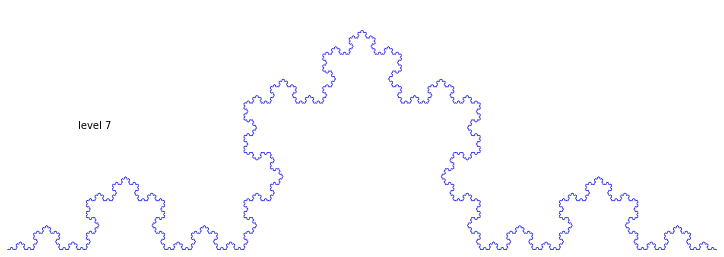

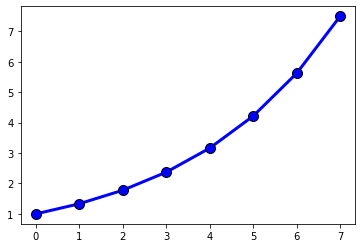

In [ ]:
import numpy as np
import pylab as plt
from google.colab import files

def koch(lev, p, t):
  if lev == 0:
    return p
  p = koch(lev - 1, p, t)
  n = p.shape[-1]
  m = t.shape[-1]
  mn = (n - 1) * (m - 1)
  pp = np.tile(p, (m, 1))
  for k in range(1, n):
    u = np.diff(p[:, [k - 1, k]]).flatten()
    a = np.angle(u[0] + 1j * u[1])
    c = np.cos(a)
    s = np.sin(a)
    R = np.array([[c, -s], [s, c]])
    q = R @ (t * np.linalg.norm(u))
    pp[:, k - 1] += q.T.flatten()
  p = np.c_[p[:, 0], pp[2 : 2 * m, : n - 1].reshape(2, mn, order="F")]
  return p

if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0,1 ],
                [0,0.]
  ])
  t = np.array([
                [0,1/3,1/2,2/3,1],
                [0,0,np.sqrt(3)/6,0,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(12.72,4.48))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(0, 1)
    plt.ylim(0, 0.32)
    plt.annotate(f'level {k}',(0.10,0.16))#,**fontopts)
    plt.gca().set_axis_off()
    plt.plot(*Q, "b-", lw=3 / (k+1))
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen
      0            3  1.00000e+00  3.00000e+00 
      1           12  3.33333e-01  4.00000e+00 
      2           48  1.11111e-01  5.33333e+00 
      3          192  3.70370e-02  7.11111e+00 
      4          768  1.23457e-02  9.48148e+00 
      5         3072  4.11523e-03  1.26420e+01 
      6        12288  1.37174e-03  1.68560e+01 
      7        49152  4.57247e-04  2.24746e+01 


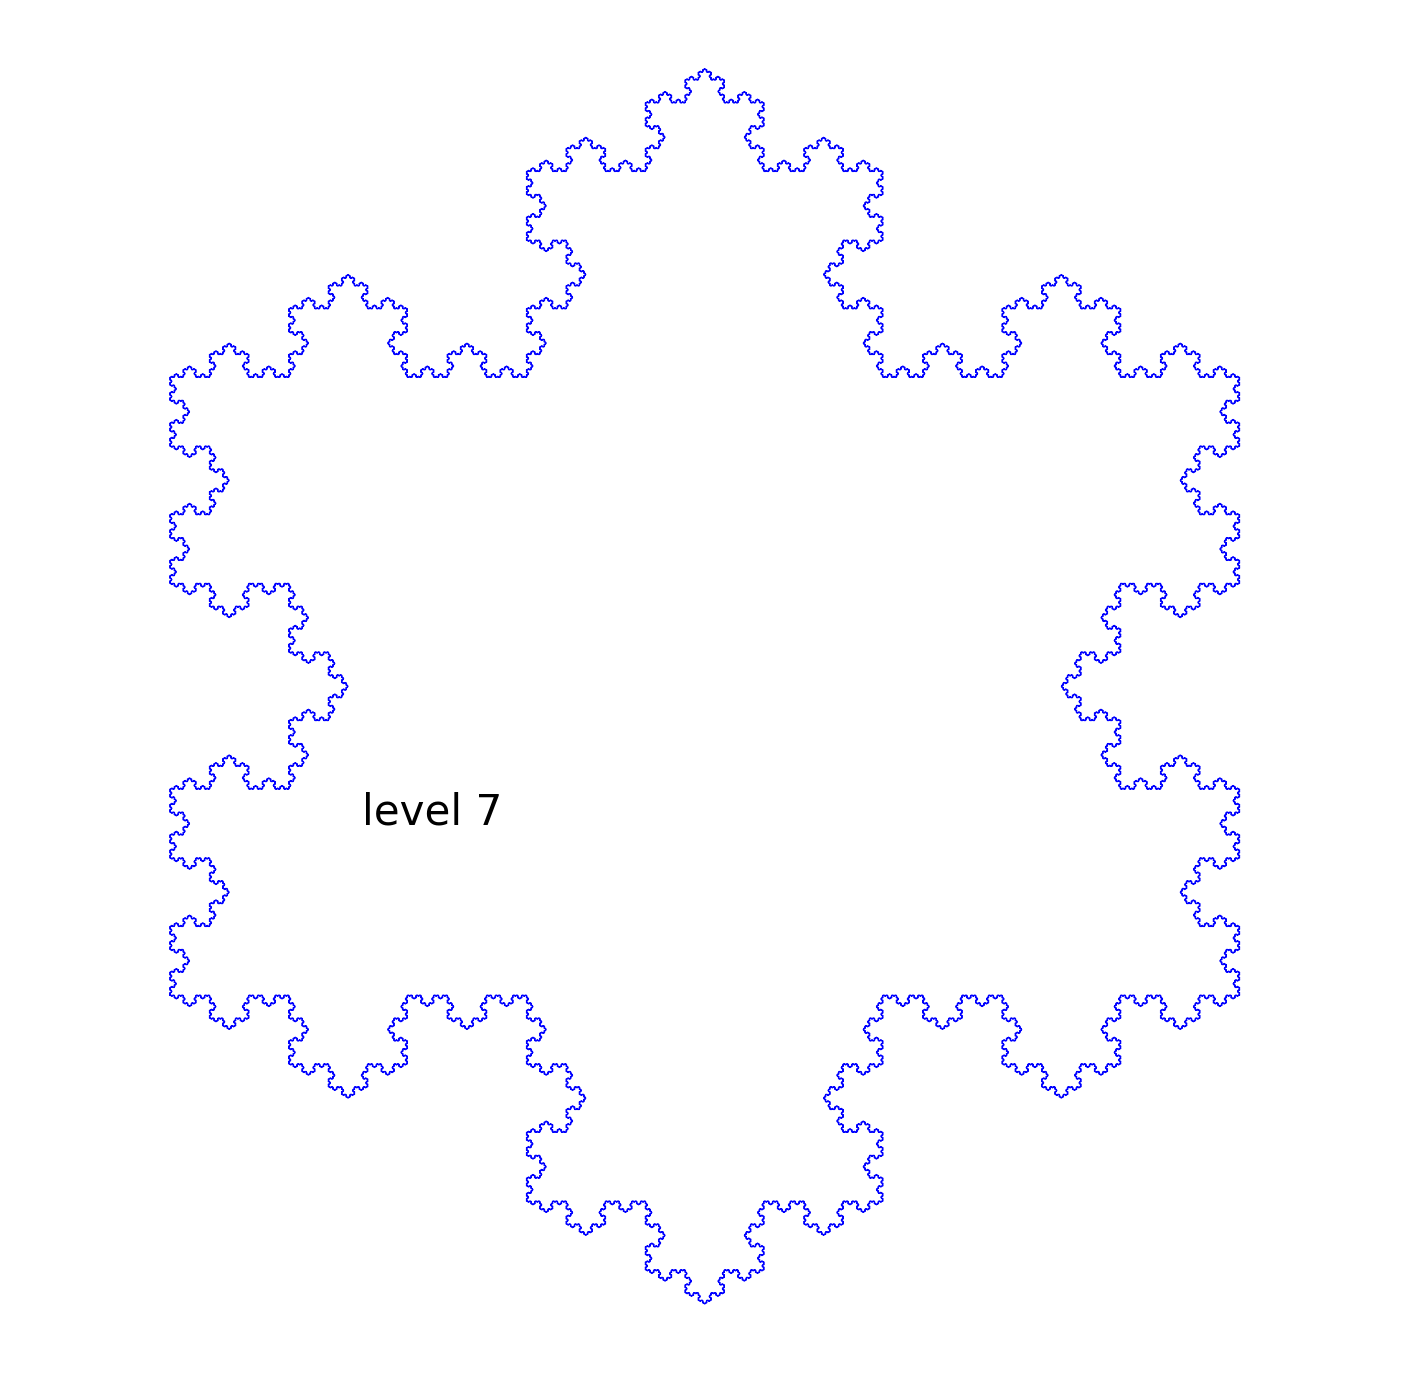

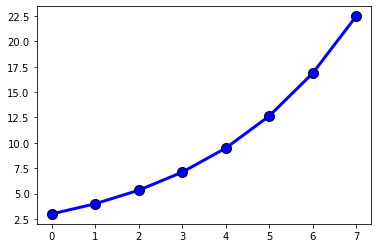

In [ ]:
if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0,1,1/2,0],
                [0,0,np.sqrt(3)/2,0.]
  ])
  t = np.array([
                [0,1/3,1/2,2/3,1],
                [0,0,-np.sqrt(3)/6,0,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(0, 1)
    plt.ylim(-0.5, 1)
    plt.annotate(f'level {k}',(0.18,0.16), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=9 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=180)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen
      0            6  1.00000e+00  6.00000e+00 
      1           24  3.48010e-01  9.37612e+00 
      2           96  1.21111e-01  1.46519e+01 
      3          384  4.21479e-02  2.28964e+01 
      4         1536  1.46679e-02  3.57799e+01 
      5         6144  5.10458e-03  5.59128e+01 
      6        24576  1.77645e-03  8.73742e+01 
      7        98304  6.18221e-04  1.36539e+02 


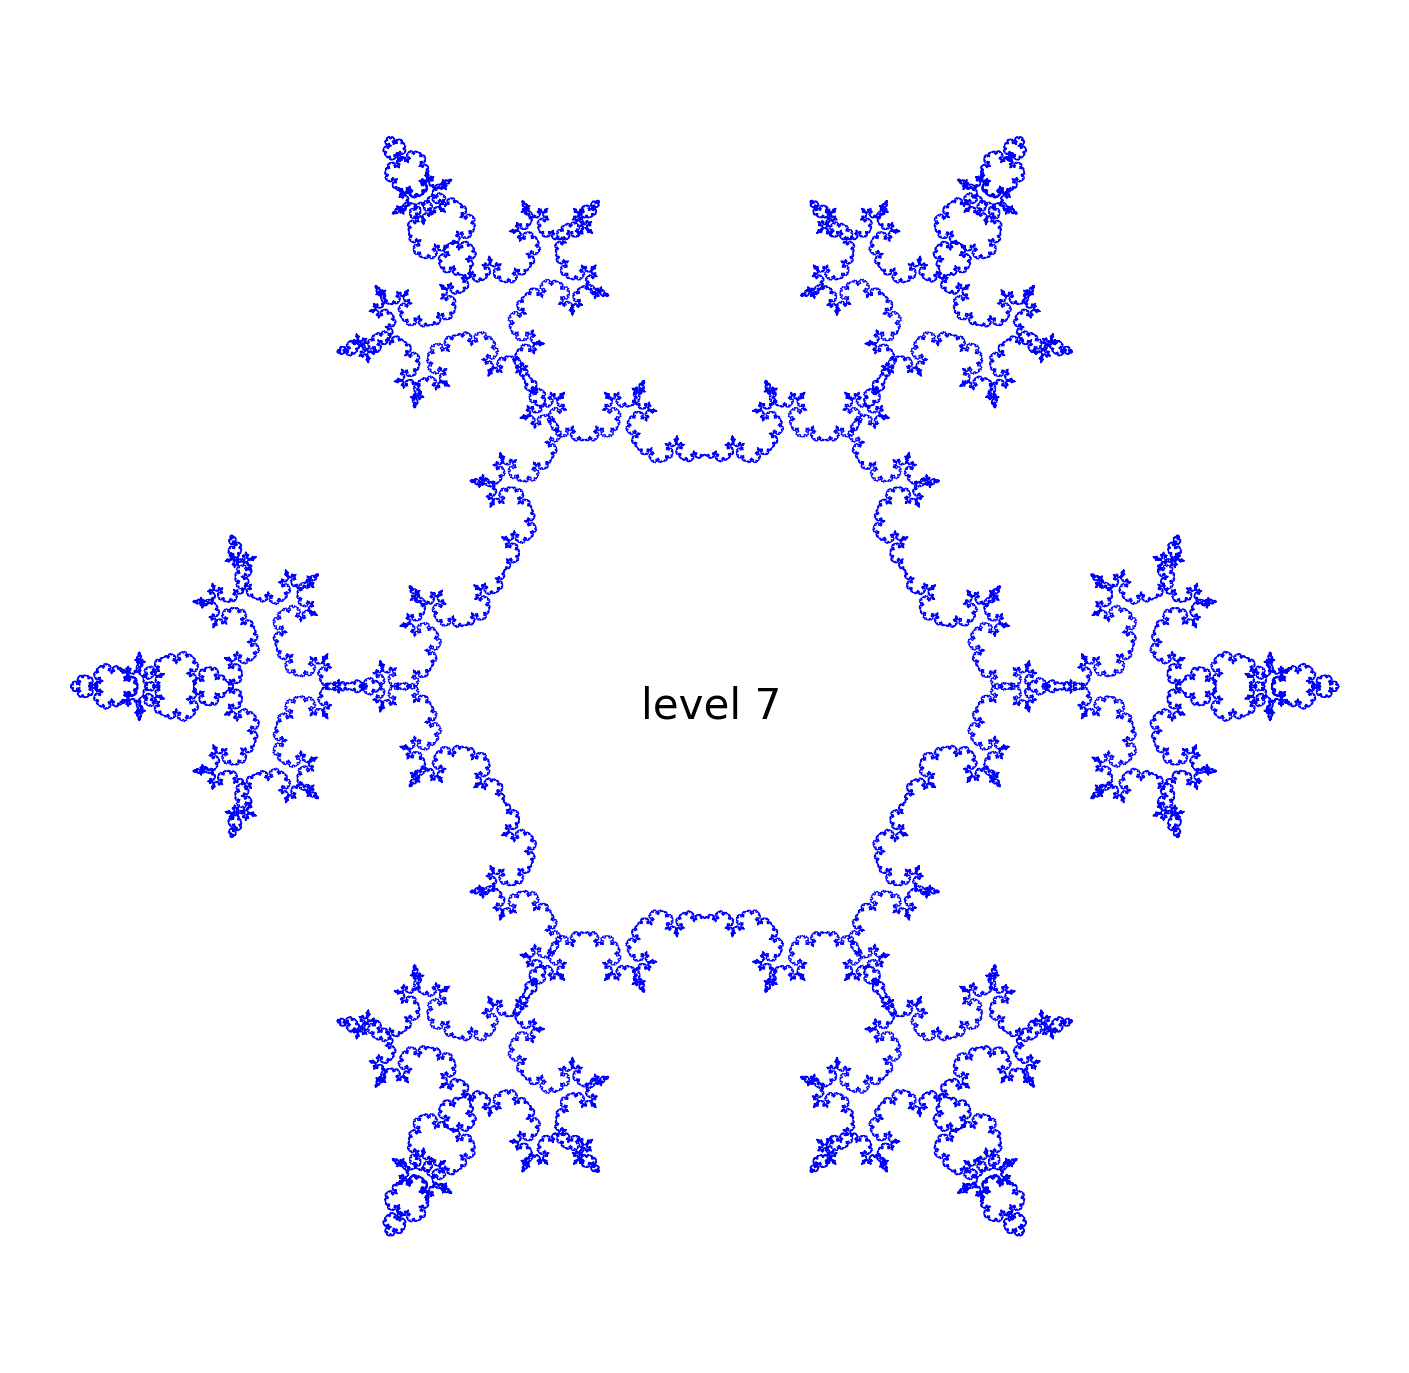

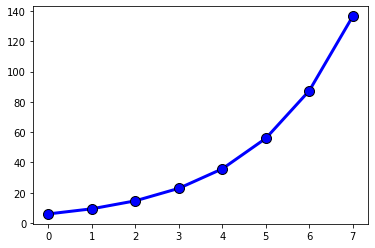

In [ ]:
import math

if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [np.cos((2*math.pi)*(1-1)/6),np.cos((2*math.pi)*(2-1)/6),np.cos((2*math.pi)*(3-1)/6),np.cos((2*math.pi)*(4-1)/6),np.cos((2*math.pi)*(5-1)/6),np.cos((2*math.pi)*(6-1)/6),np.cos((2*math.pi)*(7-1)/6)],
                [np.sin((2*math.pi)*(1-1)/6),np.sin((2*math.pi)*(2-1)/6),np.sin((2*math.pi)*(3-1)/6),np.sin((2*math.pi)*(4-1)/6),np.sin((2*math.pi)*(5-1)/6),np.sin((2*math.pi)*(6-1)/6),np.sin((2*math.pi)*(7-1)/6)]
  ])
  t = np.array([
                [0,1/3,1/2,2/3,1],
                [0,1/10,1/2,1/10,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(-1.05, 1.05)
    plt.ylim(-0.95, 0.95)
    plt.annotate(f'level {k}',(-0.10,-0.05), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=9 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen
      0            8  7.65367e-01  6.12293e+00 
      1           40  2.55122e-01  1.02049e+01 
      2          200  8.50408e-02  1.70082e+01 
      3         1000  2.83469e-02  2.83469e+01 
      4         5000  9.44897e-03  4.72449e+01 
      5        25000  3.14966e-03  7.87414e+01 
      6       125000  1.04989e-03  1.31236e+02 
      7       625000  3.49962e-04  2.18726e+02 


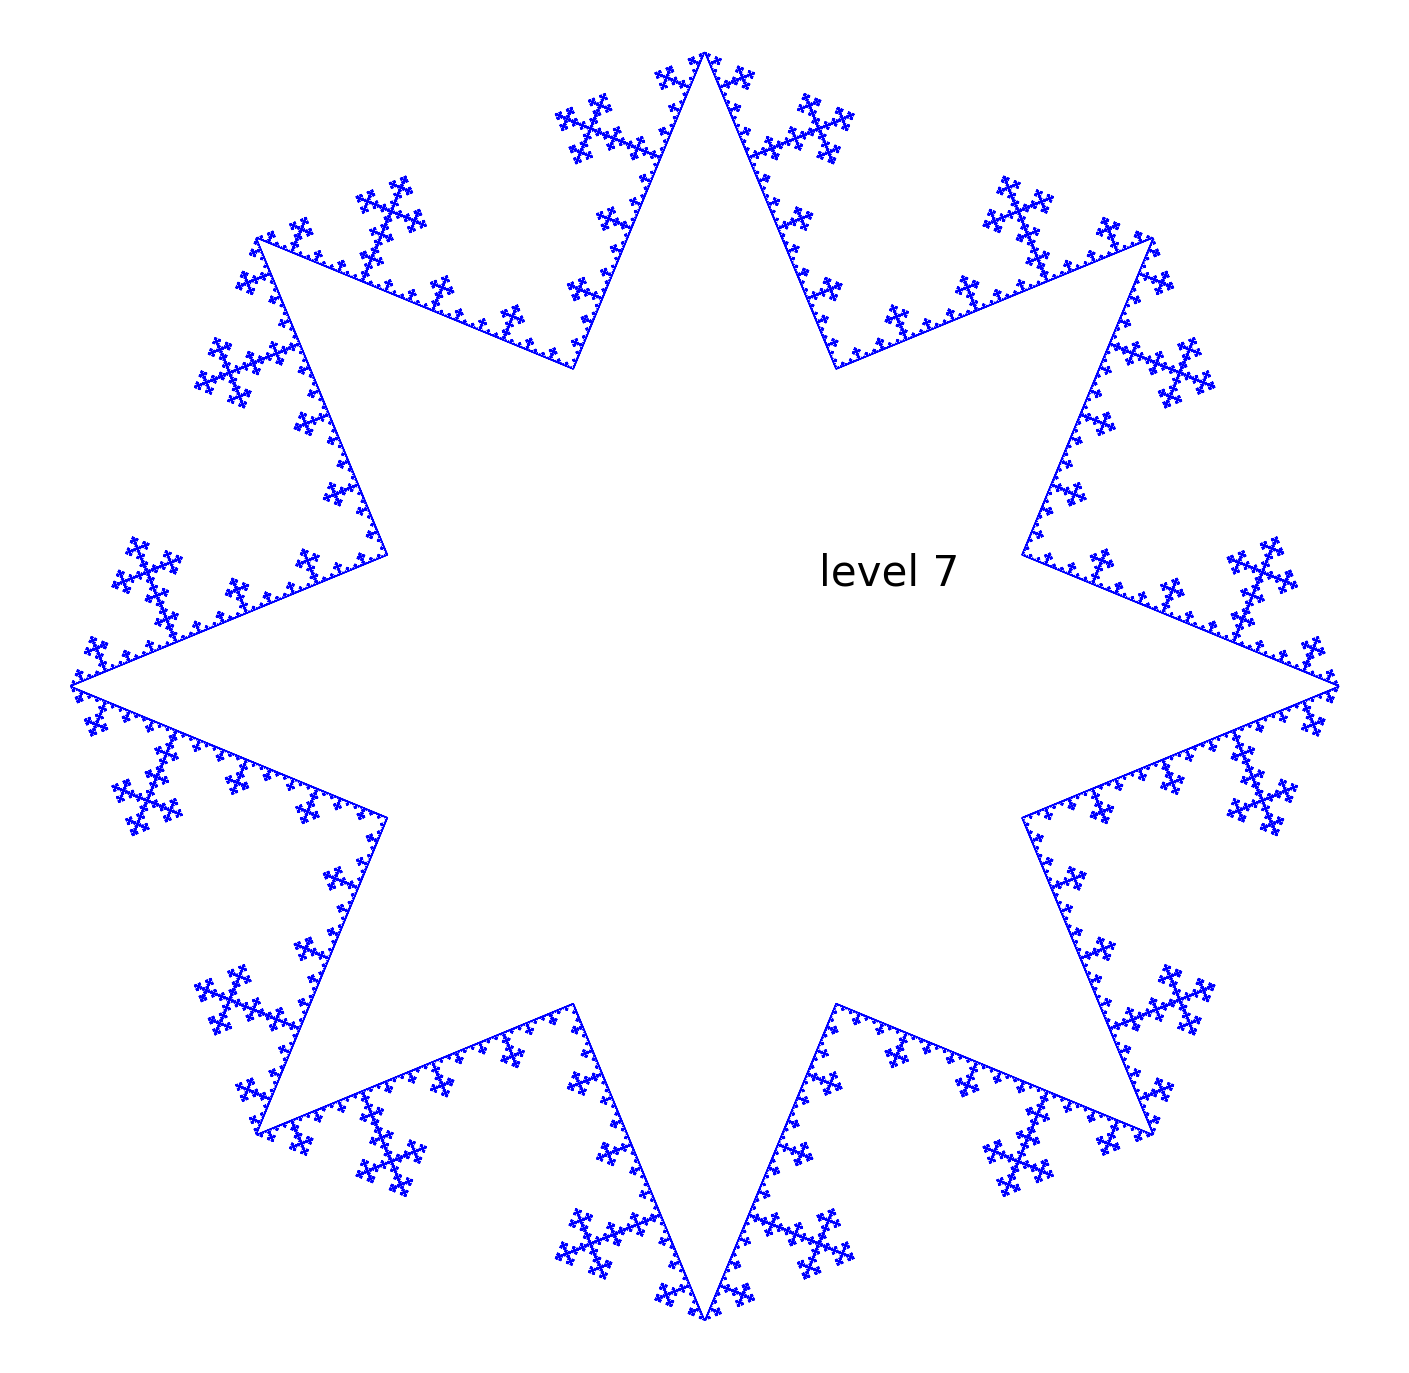

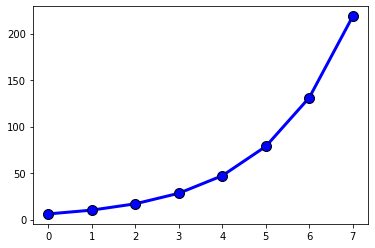

In [ ]:
import math

if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [np.cos((2*math.pi)*(1-1)/8),np.cos((2*math.pi)*(2-1)/8),np.cos((2*math.pi)*(3-1)/8),np.cos((2*math.pi)*(4-1)/8),np.cos((2*math.pi)*(5-1)/8),np.cos((2*math.pi)*(6-1)/8),np.cos((2*math.pi)*(7-1)/8),np.cos((2*math.pi)*(8-1)/8),np.cos((2*math.pi)*(9-1)/8)],
                [np.sin((2*math.pi)*(1-1)/8),np.sin((2*math.pi)*(2-1)/8),np.sin((2*math.pi)*(3-1)/8),np.sin((2*math.pi)*(4-1)/8),np.sin((2*math.pi)*(5-1)/8),np.sin((2*math.pi)*(6-1)/8),np.sin((2*math.pi)*(7-1)/8),np.sin((2*math.pi)*(8-1)/8),np.sin((2*math.pi)*(9-1)/8)]
  ])
  t = np.array([
                [0,1/3,1/3,2/3,2/3,1],
                [0,0,1/3,1/3,0,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(-1.15, 1.15)
    plt.ylim(-1.15, 1.15)
    plt.annotate(f'level {k}',(0.18,0.16), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=8 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      0            1  1.00000e+00  1.00000e+00 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      1            2  7.07107e-01  1.41421e+00 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      2            4  5.00000e-01  2.00000e+00 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      3            8  3.53553e-01  2.82843e+00 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      4           16  2.50000e-01  4.00000e+00 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      5           32  1.76777e-01  5.65685e+00 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      6           64  1.25000e-01  8.00000e+00 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      7          128  8.83883e-02  1.13137e+01 


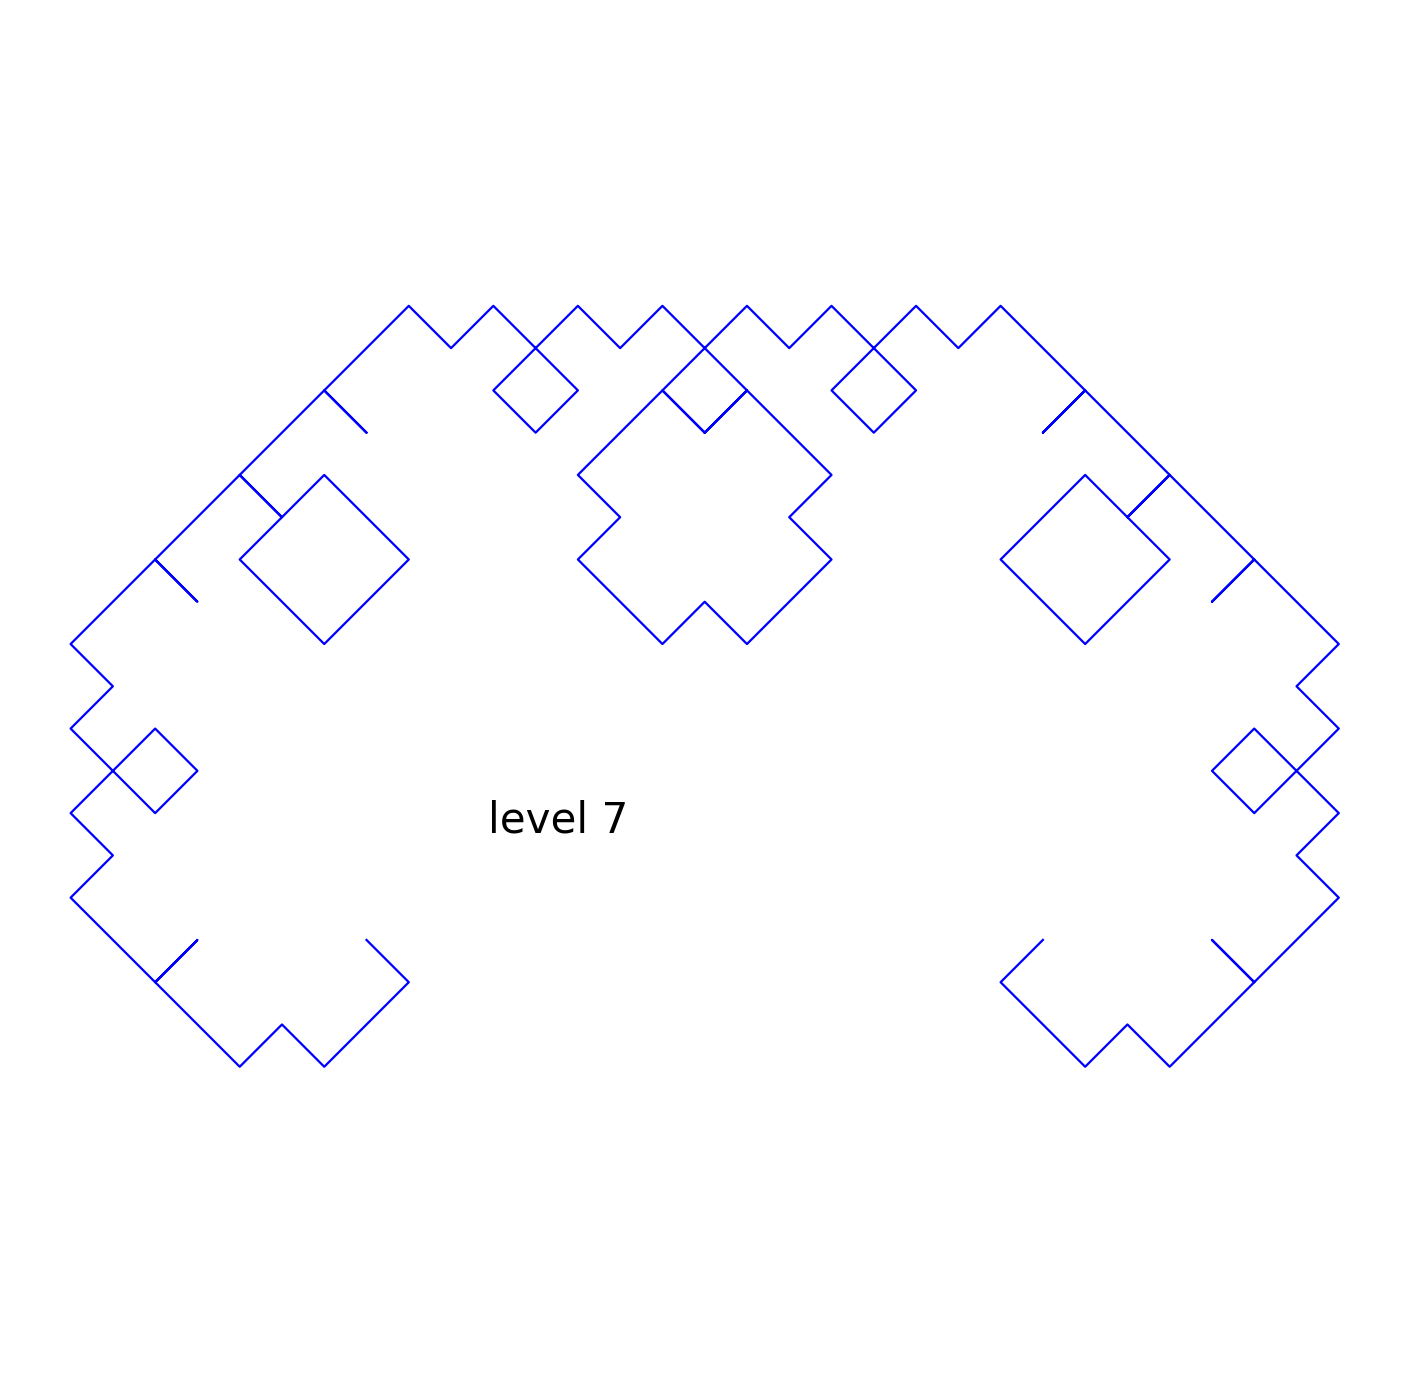

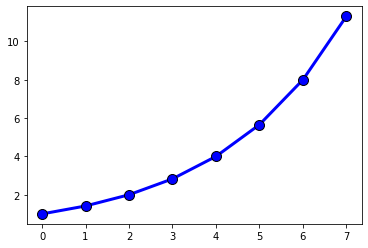

In [ ]:
import math

if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0, 1],
                [0, 0.]
  ])
  t = np.array([
                [0,1/2,1],
                [0,1/2,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(-0.5, 1.55)
    plt.ylim(-0.5, 1.55)
    plt.annotate(f'level {k}',(0.18,0.16), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=18 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen
      0            1  1.00000e+00  1.00000e+00 
      1            3  3.53553e-01  1.41421e+00 
      2            9  1.25000e-01  2.00000e+00 
      3           27  4.41942e-02  2.82843e+00 
      4           81  1.56250e-02  4.00000e+00 
      5          243  5.52427e-03  5.65685e+00 
      6          729  1.95312e-03  8.00000e+00 
      7         2187  6.90534e-04  1.13137e+01 


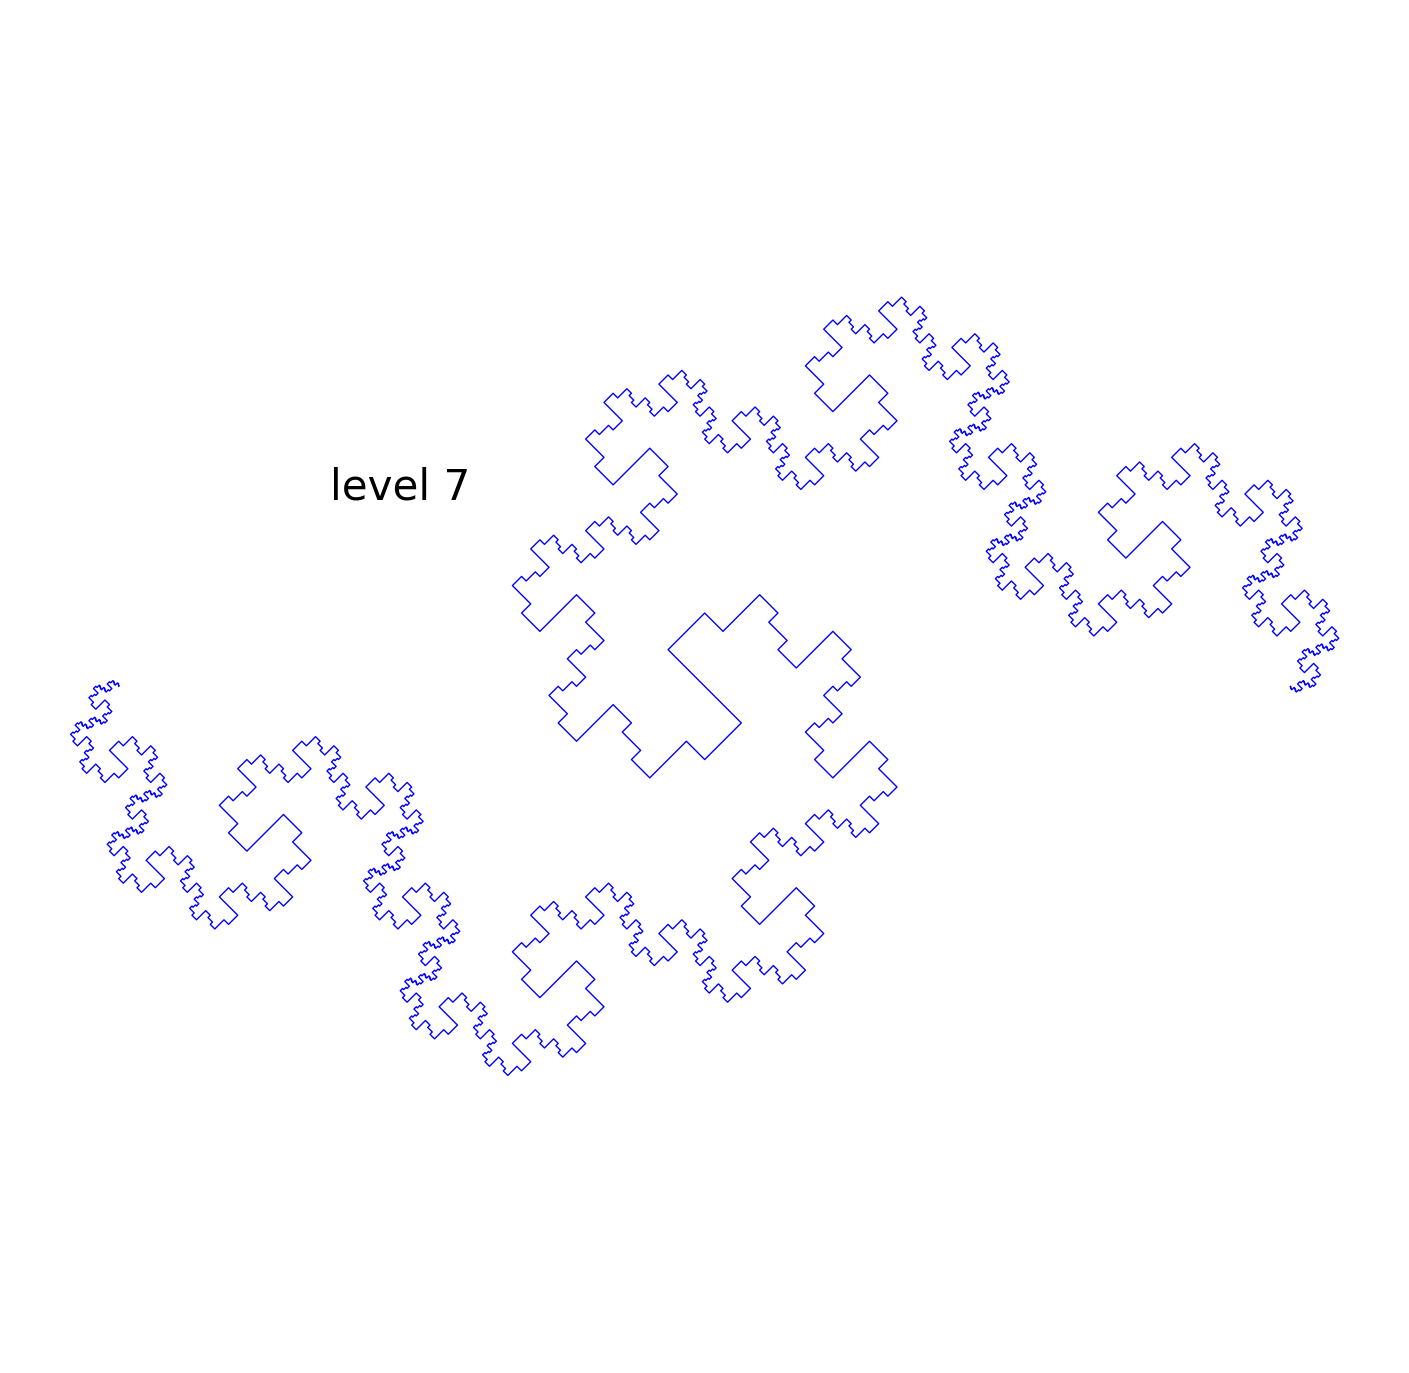

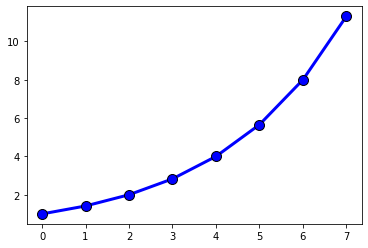

In [ ]:
import math

if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0, 1],
                [0, 0.]
  ])
  t = np.array([
                [0,1/4, 3/4,1],
                [0,-1/4,1/4,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(-0.25, 1.25)
    plt.ylim(-0.35, 0.35)
    plt.annotate(f'level {k}',(0.18,0.16), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=11 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen
      0            1  1.00000e+00  1.00000e+00 
      1            4  3.53553e-01  1.41421e+00 
      2           16  1.25000e-01  2.00000e+00 
      3           64  4.41942e-02  2.82843e+00 
      4          256  1.56250e-02  4.00000e+00 
      5         1024  5.52427e-03  5.65685e+00 
      6         4096  1.95312e-03  8.00000e+00 
      7        16384  6.90534e-04  1.13137e+01 


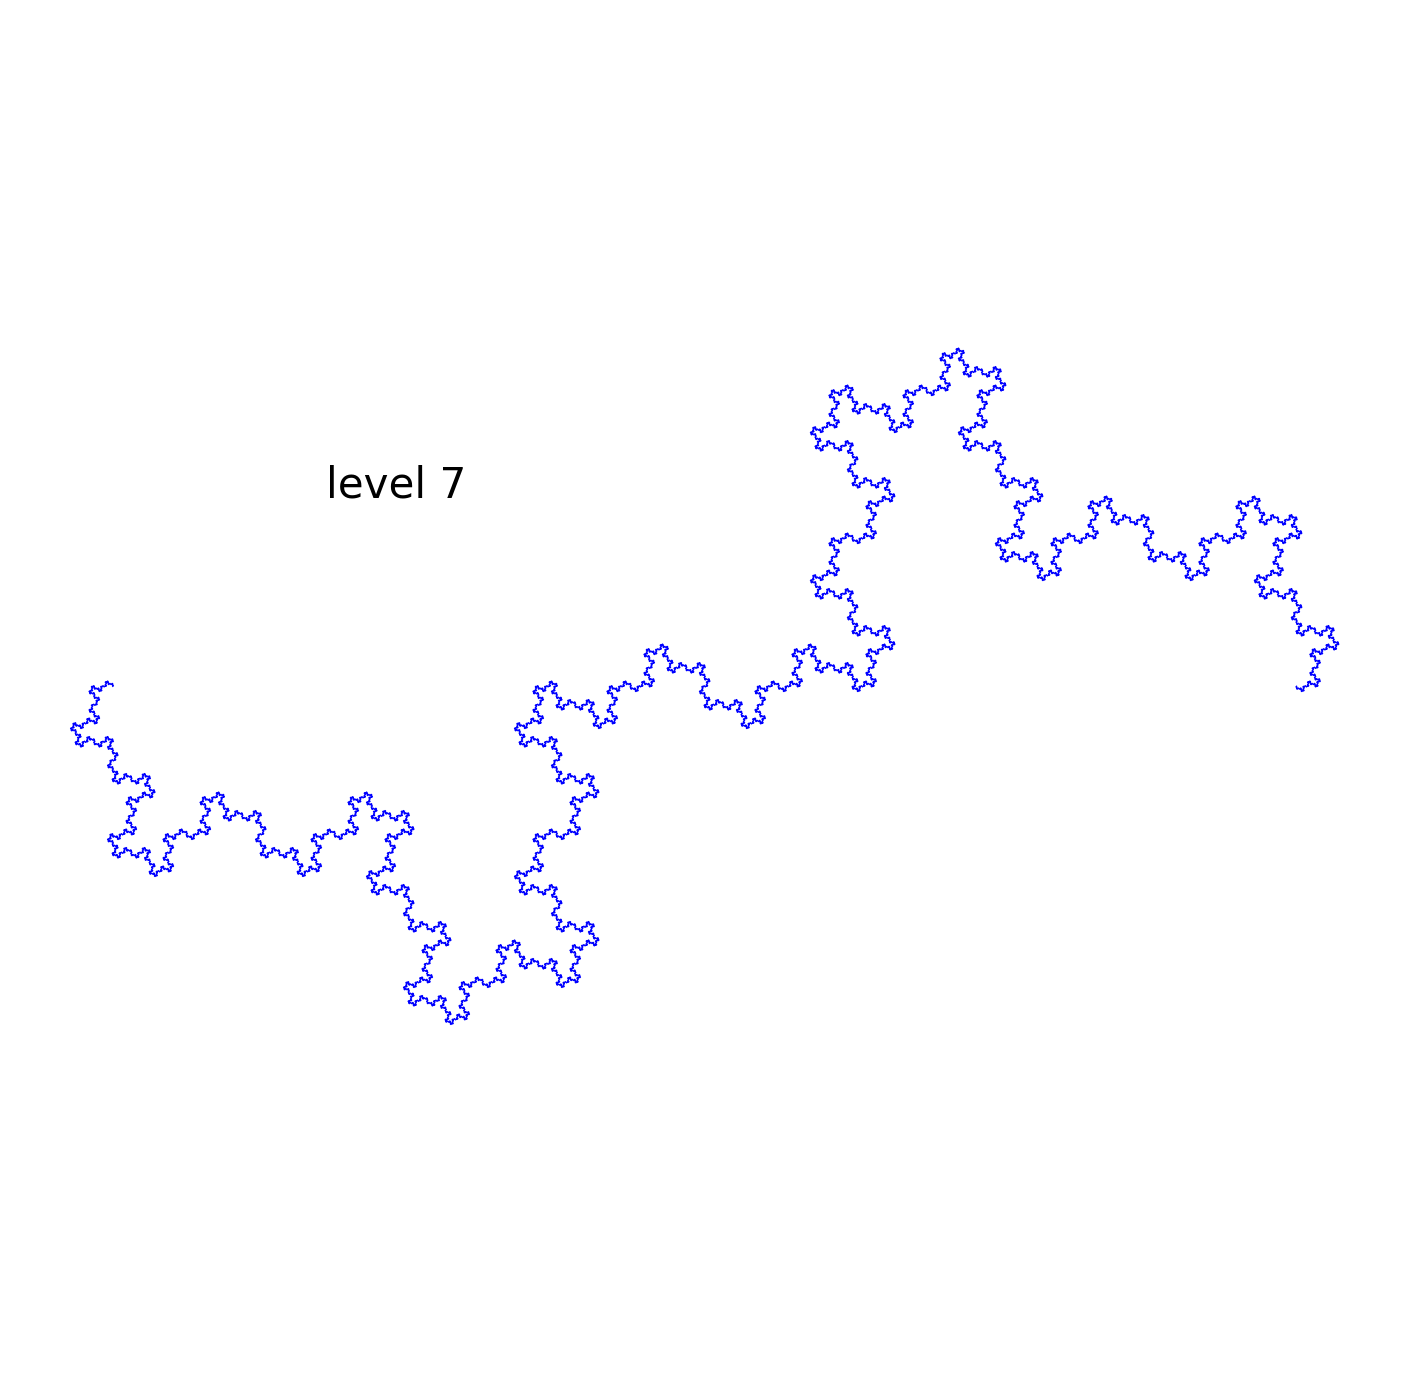

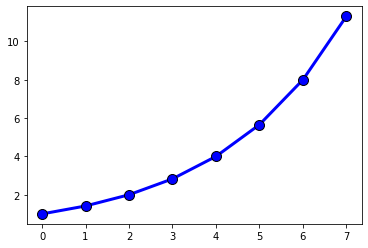

In [ ]:
import math

if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0, 1],
                [0, 0.]
  ])
  t = np.array([
                [0,1/4,1/2,3/4,1],
                [0,-1/4,0,1/4,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(-0.25, 1.25)
    plt.ylim(-0.35, 0.35)
    plt.annotate(f'level {k}',(0.18,0.16), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=11 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen
      0            1  1.00000e+00  1.00000e+00 
      1            3  5.77350e-01  1.73205e+00 
      2            9  3.33333e-01  3.00000e+00 
      3           27  1.92450e-01  5.19615e+00 
      4           81  1.11111e-01  9.00000e+00 
      5          243  6.41500e-02  1.55885e+01 
      6          729  3.70370e-02  2.70000e+01 
      7         2187  2.13833e-02  4.67654e+01 


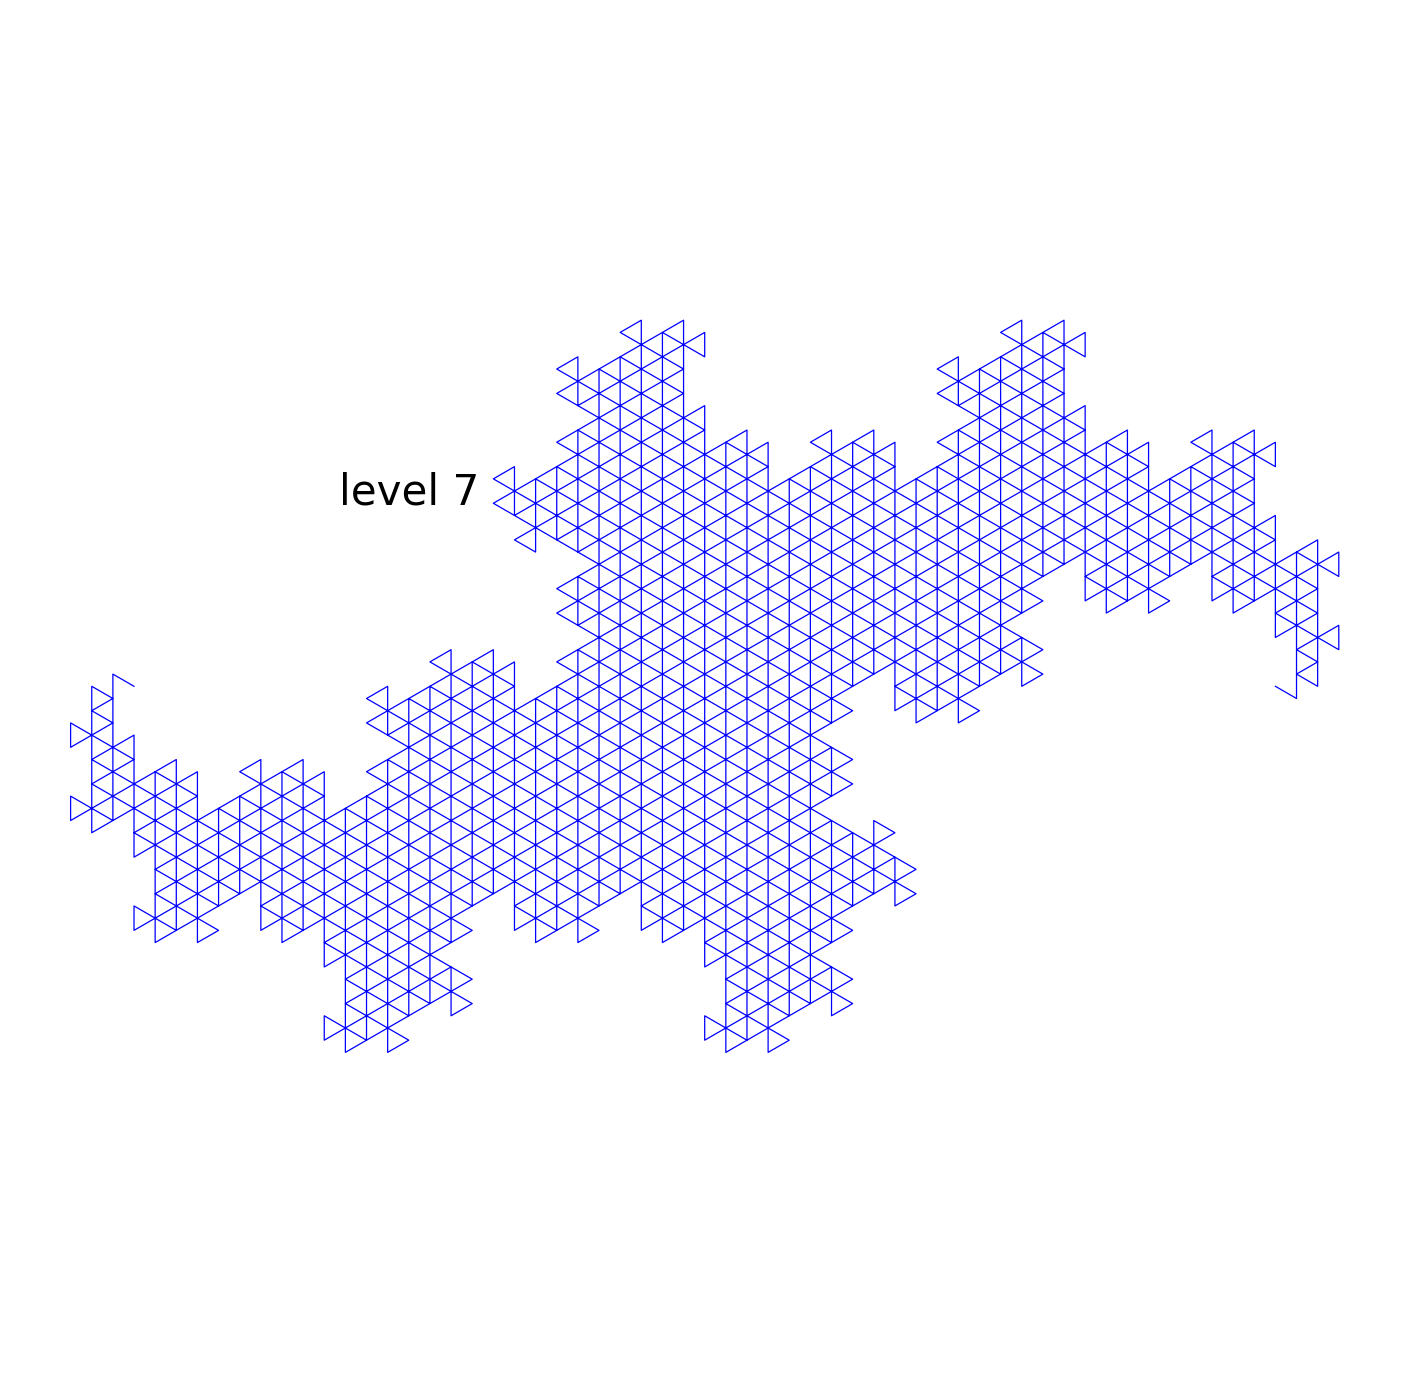

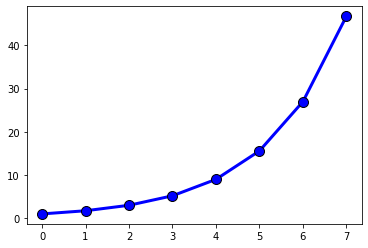

In [ ]:
import math

if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0, 1],
                [0, 0.]
  ])
  t = np.array([
                [0,1/2,1/2,1],
                [0,-1/(2*(np.sqrt(3))),1/(2*(np.sqrt(3))),0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(-0.25, 1.25)
    plt.ylim(-0.35, 0.35)
    plt.annotate(f'level {k}',(0.18,0.16), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=10 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

In [ ]:
import numpy as np
import pylab as plt
from google.colab import files

def koch2(lev, p, t1, t2):
  if lev == 0:
    return p
  p = koch2(lev - 1, p, t1, t2)
  n = p.shape[-1]
  m = t2.shape[-1]
  mn = (n - 1) * (m - 1)
  pp = np.tile(p, (m, 1))
  for k in range(1, n, 2):
    u = np.diff(p[:, [k - 1, k]]).flatten()
    a = np.angle(u[0] + 1j * u[1])
    c = np.cos(a)
    s = np.sin(a)
    R = np.array([[c, -s], [s, c]])
    q = R @ (t1 * np.linalg.norm(u))
    pp[:, k - 1] += q.T.flatten()
  for k in range(2, n, 2):
    u = np.diff(p[:, [k - 1, k]]).flatten()
    a = np.angle(u[0] + 1j * u[1])
    c = np.cos(a)
    s = np.sin(a)
    R = np.array([[c, -s], [s, c]])
    q = R @ (t2 * np.linalg.norm(u))
    pp[:, k - 1] += q.T.flatten()
  p = np.c_[p[:, 0], pp[2 : 2 * m, : n - 1].reshape(2, mn, order="F")]
  return p

if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0, 1],
                [0, 0.]
  ])
  t1 = np.array([
                [0,1/2,1],
                [0,-1/2,0]
  ])
  t2 = np.array([
                [0,1/2,1],
                [0,1/2,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch2(k, p, t1, t2)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(-0.5, 1.25)
    plt.ylim(-0.75, 0.75)
    plt.annotate(f'level {k}',(0.18,0.16), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=25 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen
      0            3  1.00000e+00  3.00000e+00 
      1           12  3.33333e-01  4.00000e+00 
      2           48  1.11111e-01  5.33333e+00 
      3          192  3.70370e-02  7.11111e+00 
      4          768  1.23457e-02  9.48148e+00 
      5         3072  4.11523e-03  1.26420e+01 
      6        12288  1.37174e-03  1.68560e+01 
      7        49152  4.57247e-04  2.24746e+01 


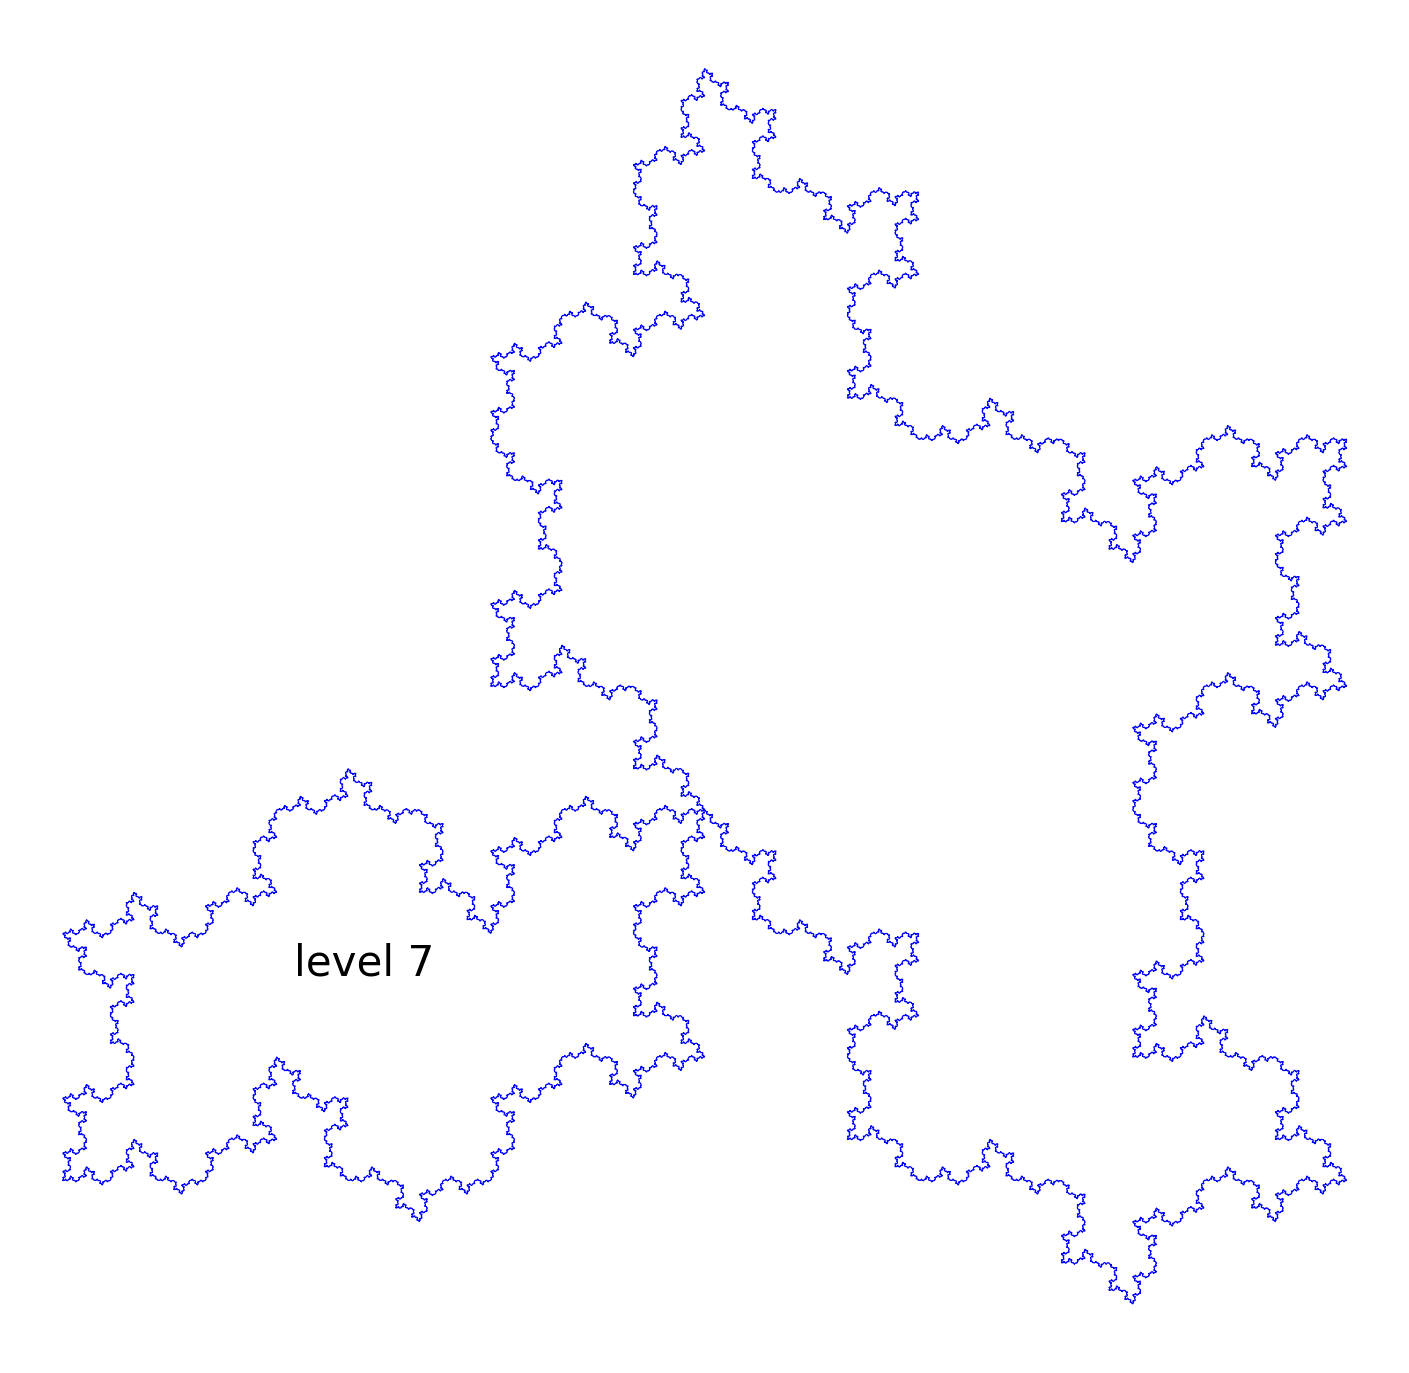

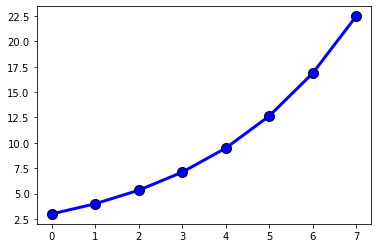

In [ ]:
if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0, 1, 1/2, 0],
                [0, 0, (np.sqrt(3))/2, 0.]
  ])
  t1 = np.array([
                [0,1/3,1/2,2/3,1],
                [0,0,(np.sqrt(3))/6,0,0]
  ])
  t2 = np.array([
                [0,1/3,1/2,2/3,1],
                [0,0,-(np.sqrt(3))/6,0,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(25,25))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch2(k, p, t1, t2)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(-0.05, 1.25)
    plt.ylim(-0.25, 1.05)
    plt.annotate(f'level {k}',(0.18,0.16), size=42)#,**fontopts)
    plt.gca().set_axis_off()
    plt.axis('equal')
    plt.plot(*Q, "b-", lw=8 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)

  level    Nsegments     Lsegment       ArcLen
      0            1  1.00000e+00  1.00000e+00 
      1            4  3.33333e-01  1.33333e+00 
      2           16  1.11111e-01  1.77778e+00 
      3           64  3.70370e-02  2.37037e+00 
      4          256  1.23457e-02  3.16049e+00 
      5         1024  4.11523e-03  4.21399e+00 
      6         4096  1.37174e-03  5.61866e+00 
      7        16384  4.57247e-04  7.49154e+00 


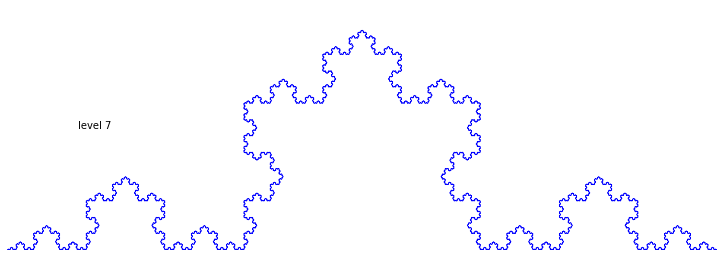

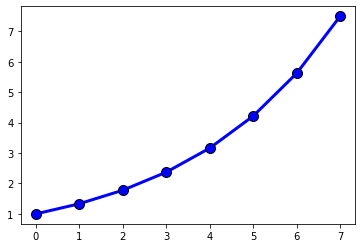

In [ ]:
if __name__ == '__main__':
  fontopts=dict(
      ha='left',
      fontsize=24,
      font='SF Mono',
      fontweight='bold',
      color='#0000ffAA',
  )
  p = np.array([
                [0,1 ],
                [0,0.]
  ])
  t = np.array([
                [0,1/3,1/2,2/3,1],
                [0,0,np.sqrt(3)/6,0,0]
  ])
  L,N,E = [],[],[]
  plt.figure(1,figsize=(12.72,4.48))
  Q = p + 0
  print('{:>7s} {:>12s} {:>12s} {:>12s}'.format(*'level Nsegments Lsegment ArcLen'.split()))
  for k in range(8):
    Q = koch(k, p, t)
    dQ= np.diff(Q)
    L.append(np.linalg.norm(dQ, axis=0).sum())
    N.append(Q.shape[-1]-1)
    E.append(np.linalg.norm(dQ[:,0]))
    plt.clf()
    plt.xlim(0, 1)
    plt.ylim(0, 0.32)
    plt.annotate(f'level {k}',(0.10,0.16))#,**fontopts)
    plt.gca().set_axis_off()
    plt.plot(*Q, "b-", lw=5 / (k+1))
    #plt.figure(figsize=(9, 9), dpi=80)
    plt.savefig(f"out_{k-1:02d}.png", bbox_inches="tight")
    #files.download(f"out_{k-1:02d}.png")
    print(f'{k:7d} {N[k]:12d} {E[k]:12.5e} {L[k]:12.5e} ')
  L = np.array(L)

  plt.figure(2)
  plt.plot(L,'-o',c='b',mfc='b',mec='k',ms=10,lw=3)